In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

Data loading

In [3]:
df=pd.read_csv("D:\project\house price prediction\House_Data.csv")

In [4]:
df.shape

(62810, 32)

In [5]:
df.columns

Index(['Unnamed: 0', 'Price', 'Beds', 'Baths', 'sq.ft', 'Floor',
       'Move_in_date', 'building_id', 'unit_id', 'URL', 'Day_Recorded',
       'Amenity', 'Apartment Name', 'Address', 'City', 'Units',
       'Northern_Exposure', 'Southern_Exposure', 'Eastern_Exposure',
       'Western_Exposure', 'Balcony', 'Walk_In_Closet', 'Fireplace',
       'City_Skyline', 'Kitchen_Island', 'Stainless_Appliances', 'Renovated',
       'Office_Space', 'Days_Till_Available', 'Day_of_the_week_recorded',
       'Unique_ID', 'Estiamted_Vacancy'],
      dtype='object')

In [6]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [7]:
df[['Beds','Price']].head(5)

,Beds,Price
0,0,2377
1,1,2816
2,2,3811
3,0,1549
4,1,1753


In [8]:
df.head(5)

,Unnamed: 0,Price,Beds,Baths,sq.ft,Floor,Move_in_date,building_id,unit_id,URL,...,Fireplace,City_Skyline,Kitchen_Island,Stainless_Appliances,Renovated,Office_Space,Days_Till_Available,Day_of_the_week_recorded,Unique_ID,Estiamted_Vacancy
0,1,2377,0,1,523,5,9/2/2021,1,507,https://www.equityapartments.com/washington-dc...,...,0.0,0.0,0.0,1.0,1.0,0.0,47.0,Wednesday,0105071210MassApartments,0.020833
1,2,2816,1,1,713,2,9/13/2021,1,204,https://www.equityapartments.com/washington-dc...,...,0.0,0.0,0.0,1.0,1.0,0.0,58.0,Wednesday,0102041210MassApartments,0.020833
2,3,3811,2,2,1252,6,10/8/2021,1,608,https://www.equityapartments.com/washington-dc...,...,1.0,0.0,0.0,0.0,0.0,0.0,83.0,Wednesday,0106081210MassApartments,0.020833
3,4,1549,0,1,456,2,9/17/2021,1,256 \r\n,https://www.equityapartments.com/washington-dc...,...,0.0,0.0,0.0,0.0,0.0,0.0,62.0,Wednesday,1256\r\n1500MassApartments,0.003597
4,5,1753,1,1,580,3,10/5/2021,1,337 \r\n,https://www.equityapartments.com/washington-dc...,...,0.0,0.0,0.0,0.0,0.0,0.0,80.0,Wednesday,1337\r\n1500MassApartments,0.003597


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62810 entries, 0 to 62809
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                62810 non-null  int64  
 1   Price                     62810 non-null  int64  
 2   Beds                      62810 non-null  int64  
 3   Baths                     62810 non-null  int64  
 4   sq.ft                     62810 non-null  int64  
 5   Floor                     62810 non-null  int64  
 6   Move_in_date              62022 non-null  object 
 7   building_id               61958 non-null  object 
 8   unit_id                   61958 non-null  object 
 9   URL                       62810 non-null  object 
 10  Day_Recorded              62810 non-null  object 
 11  Amenity                   60319 non-null  object 
 12  Apartment Name            62810 non-null  object 
 13  Address                   62810 non-null  object 
 14  City  

"Unnamed: 0" columns drop

In [10]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [11]:
df.describe()

,Price,Beds,Baths,sq.ft,Floor,Units,Northern_Exposure,Southern_Exposure,Eastern_Exposure,Western_Exposure,Balcony,Walk_In_Closet,Fireplace,City_Skyline,Kitchen_Island,Stainless_Appliances,Renovated,Office_Space,Days_Till_Available,Estiamted_Vacancy
count,62810.000000,62810.000000,62810.000000,62810.000000,62810.000000,62810.000000,60319.000000,60319.000000,60319.000000,60319.000000,60319.000000,60319.000000,60319.000000,60319.000000,60319.000000,60319.000000,60319.000000,60319.000000,62022.000000,62810.000000
mean,3000.848559,1.291291,1.407037,846.905827,6.414202,338.785528,0.207464,0.188697,0.231453,0.223644,0.240903,0.119316,0.089358,0.027786,0.038363,0.079411,0.210050,0.021303,27.174857,0.081126
std,1009.977924,0.707895,0.545932,250.359228,7.260055,147.851929,0.405494,0.391271,0.421765,0.416690,0.427635,0.324162,0.285263,0.164359,0.192072,0.270382,0.407347,0.144395,25.531519,0.103878
min,1211.000000,0.000000,1.000000,210.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001773
25%,2289.000000,1.000000,1.000000,674.000000,2.000000,229.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.041667
50%,2803.000000,1.000000,1.000000,782.000000,3.000000,316.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.059925
75%,3453.000000,2.000000,2.000000,1046.000000,8.000000,444.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.077348
max,9890.000000,3.000000,3.000000,1917.000000,49.000000,761.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,434.000000,0.675325


### Data Cleaning

Ckeck Null Values

In [12]:
df.isnull().sum()

Price                          0
Beds                           0
Baths                          0
sq.ft                          0
Floor                          0
Move_in_date                 788
building_id                  852
unit_id                      852
URL                            0
Day_Recorded                   0
Amenity                     2491
Apartment Name                 0
Address                        0
City                           0
Units                          0
Northern_Exposure           2491
Southern_Exposure           2491
Eastern_Exposure            2491
Western_Exposure            2491
Balcony                     2491
Walk_In_Closet              2491
Fireplace                   2491
City_Skyline                2491
Kitchen_Island              2491
Stainless_Appliances        2491
Renovated                   2491
Office_Space                2491
Days_Till_Available          788
Day_of_the_week_recorded       0
Unique_ID                    852
Estiamted_

### Removing Un-Necessary Columns

In [13]:
df=df.drop(['URL','unit_id','building_id','Unique_ID','Amenity'], axis=1)

In [14]:
df.columns

Index(['Price', 'Beds', 'Baths', 'sq.ft', 'Floor', 'Move_in_date',
       'Day_Recorded', 'Apartment Name', 'Address', 'City', 'Units',
       'Northern_Exposure', 'Southern_Exposure', 'Eastern_Exposure',
       'Western_Exposure', 'Balcony', 'Walk_In_Closet', 'Fireplace',
       'City_Skyline', 'Kitchen_Island', 'Stainless_Appliances', 'Renovated',
       'Office_Space', 'Days_Till_Available', 'Day_of_the_week_recorded',
       'Estiamted_Vacancy'],
      dtype='object')

Checking Null values

In [15]:
df.isnull().sum()

Price                          0
Beds                           0
Baths                          0
sq.ft                          0
Floor                          0
Move_in_date                 788
Day_Recorded                   0
Apartment Name                 0
Address                        0
City                           0
Units                          0
Northern_Exposure           2491
Southern_Exposure           2491
Eastern_Exposure            2491
Western_Exposure            2491
Balcony                     2491
Walk_In_Closet              2491
Fireplace                   2491
City_Skyline                2491
Kitchen_Island              2491
Stainless_Appliances        2491
Renovated                   2491
Office_Space                2491
Days_Till_Available          788
Day_of_the_week_recorded       0
Estiamted_Vacancy              0
dtype: int64

### Filing NA values By Mean

In [16]:
df['Northern_Exposure']= df['Northern_Exposure'].fillna(df.Northern_Exposure.mean())
df['Southern_Exposure']= df['Southern_Exposure'].fillna(df.Southern_Exposure.mean())
df['Eastern_Exposure']= df['Eastern_Exposure'].fillna(df.Eastern_Exposure.mean())
df['Western_Exposure']= df['Western_Exposure'].fillna(df.Western_Exposure.mean())
df['Balcony']= df['Balcony'].fillna(df.Balcony.mean())
df['Walk_In_Closet']= df['Walk_In_Closet'].fillna(df.Walk_In_Closet.mean())
df['Fireplace']= df['Fireplace'].fillna(df.Fireplace.mean())
df['City_Skyline']= df['City_Skyline'].fillna(df.City_Skyline.mean())
df['Fireplace']= df['Fireplace'].fillna(df.Fireplace.mean())
df['Kitchen_Island']= df['Kitchen_Island'].fillna(df.Kitchen_Island.mean())
df['Stainless_Appliances']= df['Stainless_Appliances'].fillna(df.Stainless_Appliances.mean())
df['Renovated']= df['Renovated'].fillna(df.Renovated.mean())
df['Office_Space']= df['Office_Space'].fillna(df.Fireplace.mean())
df['Days_Till_Available']= df['Days_Till_Available'].fillna(df.Days_Till_Available.mean())


In [17]:
df['Move_in_date'] = pd.to_datetime(df.Move_in_date)
df['Day_Recorded'] = pd.to_datetime(df.Day_Recorded)

In [18]:
df.isnull().sum()

Price                         0
Beds                          0
Baths                         0
sq.ft                         0
Floor                         0
Move_in_date                788
Day_Recorded                  0
Apartment Name                0
Address                       0
City                          0
Units                         0
Northern_Exposure             0
Southern_Exposure             0
Eastern_Exposure              0
Western_Exposure              0
Balcony                       0
Walk_In_Closet                0
Fireplace                     0
City_Skyline                  0
Kitchen_Island                0
Stainless_Appliances          0
Renovated                     0
Office_Space                  0
Days_Till_Available           0
Day_of_the_week_recorded      0
Estiamted_Vacancy             0
dtype: int64

In [19]:
df.head()

,Price,Beds,Baths,sq.ft,Floor,Move_in_date,Day_Recorded,Apartment Name,Address,City,...,Walk_In_Closet,Fireplace,City_Skyline,Kitchen_Island,Stainless_Appliances,Renovated,Office_Space,Days_Till_Available,Day_of_the_week_recorded,Estiamted_Vacancy
0,2377,0,1,523,5,2021-09-02,2021-07-17,1210 Mass Apartments,"1210 Massachusetts Ave, NW\r\n\r\nWashington D...",Washington DC,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,47.0,Wednesday,0.020833
1,2816,1,1,713,2,2021-09-13,2021-07-17,1210 Mass Apartments,"1210 Massachusetts Ave, NW\r\n\r\nWashington D...",Washington DC,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,58.0,Wednesday,0.020833
2,3811,2,2,1252,6,2021-10-08,2021-07-17,1210 Mass Apartments,"1210 Massachusetts Ave, NW\r\n\r\nWashington D...",Washington DC,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,83.0,Wednesday,0.020833
3,1549,0,1,456,2,2021-09-17,2021-07-17,1500 Mass Apartments,1500 Massachusetts Avenue NW\r\n\r\nWashington...,Washington DC,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,Wednesday,0.003597
4,1753,1,1,580,3,2021-10-05,2021-07-17,1500 Mass Apartments,1500 Massachusetts Avenue NW\r\n\r\nWashington...,Washington DC,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,Wednesday,0.003597


In [20]:
# timedelta() are used for diff between dates

days=df.Days_Till_Available[0]

print(days)

print("Day_Recorded index=0",df.Day_Recorded[0])

print("move_in_date index-0",df.Move_in_date[0])

a=df.Day_Recorded[0]+dt.timedelta(days=df.Days_Till_Available[0])

print("new date",a)

47.0
Day_Recorded index=0 2021-07-17 00:00:00
move_in_date index-0 2021-09-02 00:00:00
new date 2021-09-02 00:00:00


In "Move_in_date" column there are missing value , There are other column "Days_Till_Available" ,if we add the value "Days_Till_Available" column with "Day_Recorded" the same Date in "Move_in_Date" column.

In [22]:
df['Move_in_date(new)'] = a

In [23]:
df[['Move_in_date','Move_in_date(new)']]

,Move_in_date,Move_in_date(new)
0,2021-09-02,2021-09-02
1,2021-09-13,2021-09-02
2,2021-10-08,2021-09-02
3,2021-09-17,2021-09-02
4,2021-10-05,2021-09-02
...,...,...
62805,2021-06-29,2021-09-02
62806,2021-07-17,2021-09-02
62807,2021-07-27,2021-09-02
62808,2021-08-21,2021-09-02


Here We can see Old Column Move in date is completely identical with New Move In date without any null values, so we do not need old column.

In [24]:
df.drop("Move_in_date",axis=1,inplace=True)

In [25]:
df.isnull().sum()

Price                       0
Beds                        0
Baths                       0
sq.ft                       0
Floor                       0
Day_Recorded                0
Apartment Name              0
Address                     0
City                        0
Units                       0
Northern_Exposure           0
Southern_Exposure           0
Eastern_Exposure            0
Western_Exposure            0
Balcony                     0
Walk_In_Closet              0
Fireplace                   0
City_Skyline                0
Kitchen_Island              0
Stainless_Appliances        0
Renovated                   0
Office_Space                0
Days_Till_Available         0
Day_of_the_week_recorded    0
Estiamted_Vacancy           0
Move_in_date(new)           0
dtype: int64

C:\Users\SHUBHAM\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

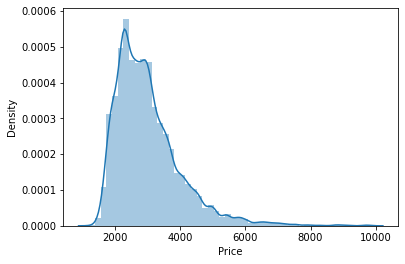

In [66]:
plt.figure(figsize=(6,4))
sns.distplot(df.Price,kde=True)

In [27]:
df['Price'].describe()

count    62810.000000
mean      3000.848559
std       1009.977924
min       1211.000000
25%       2289.000000
50%       2803.000000
75%       3453.000000
max       9890.000000
Name: Price, dtype: float64

C:\Users\SHUBHAM\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Beds', ylabel='Density'>

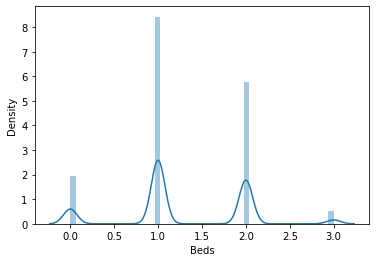

In [65]:
plt.figure(figsize=(6,4))
sns.distplot(df.Beds,kde=True)

C:\Users\SHUBHAM\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Baths', ylabel='Density'>

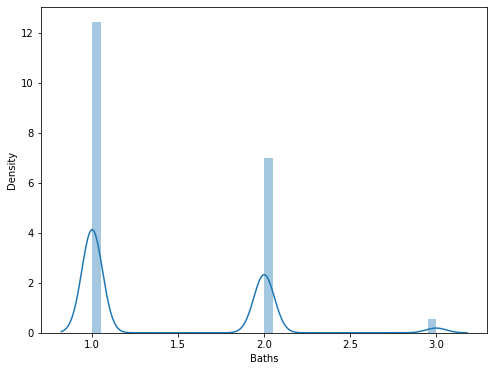

In [67]:
plt.figure(figsize=(8,6))
sns.distplot(df.Baths,kde=True)

C:\Users\SHUBHAM\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sq.ft', ylabel='Density'>

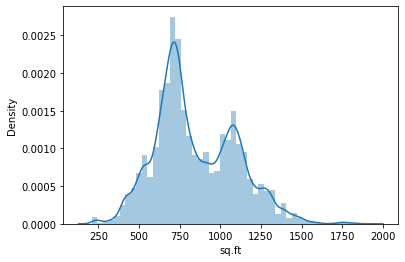

In [30]:
plt.figure(figsize=(6,4))
sns.distplot(df['sq.ft'],kde=True)

C:\Users\SHUBHAM\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Floor', ylabel='Density'>

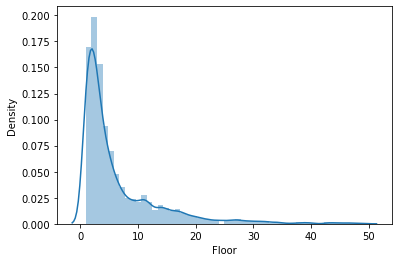

In [68]:
plt.figure(figsize=(6,4))
sns.distplot(df.Floor,kde=True)

In [32]:
df.corr()

,Price,Beds,Baths,sq.ft,Floor,Units,Northern_Exposure,Southern_Exposure,Eastern_Exposure,Western_Exposure,Balcony,Walk_In_Closet,Fireplace,City_Skyline,Kitchen_Island,Stainless_Appliances,Renovated,Office_Space,Days_Till_Available,Estiamted_Vacancy
Price,1.000000,0.455246,0.387458,0.505536,0.373786,-0.115443,0.072003,0.034620,0.051369,0.031287,-0.006333,0.176599,-0.064170,-0.016416,0.008358,0.011411,-0.066252,0.060619,0.038278,0.152380
Beds,0.455246,1.000000,0.673532,0.860518,-0.154878,-0.003340,0.025584,0.063081,0.034386,-0.004432,0.056058,0.037655,0.177984,-0.031694,0.043874,0.007015,0.046939,0.022150,0.045439,0.076259
Baths,0.387458,0.673532,1.000000,0.673606,-0.030402,-0.017404,0.051478,0.045219,0.030988,0.016732,0.033785,0.052726,0.133656,-0.006000,0.031498,0.002329,0.018883,0.053568,0.045495,0.050897
sq.ft,0.505536,0.860518,0.673606,1.000000,-0.068601,0.055204,0.050929,0.052718,0.040961,0.011372,0.093358,0.069976,0.154803,-0.035590,0.051629,0.076679,-0.006568,0.148114,0.061627,0.095826
Floor,0.373786,-0.154878,-0.030402,-0.068601,1.000000,0.075997,0.035632,-0.031698,0.023049,0.067749,-0.055852,0.053958,-0.148665,0.082530,-0.030471,0.074851,-0.098520,-0.035884,0.086618,0.115788
Units,-0.115443,-0.003340,-0.017404,0.055204,0.075997,1.000000,0.036464,-0.002199,0.057633,0.046326,0.042121,-0.002144,0.061376,-0.034615,0.041387,0.015800,0.045242,0.032660,0.041420,-0.242157
Northern_Exposure,0.072003,0.025584,0.051478,0.050929,0.035632,0.036464,1.000000,-0.217175,0.020221,0.001503,-0.016794,0.026850,0.050418,-0.054405,-0.005762,0.092127,0.053139,0.059881,0.086888,-0.049009
Southern_Exposure,0.034620,0.063081,0.045219,0.052718,-0.031698,-0.002199,-0.217175,1.000000,0.011915,-0.020288,0.005950,0.037769,0.017516,-0.053173,0.021698,0.042491,0.031852,0.005412,0.064185,-0.045472
Eastern_Exposure,0.051369,0.034386,0.030988,0.040961,0.023049,0.057633,0.020221,0.011915,1.000000,-0.244637,0.017351,-0.011855,0.054081,-0.026287,-0.031840,0.054422,0.078307,0.030243,0.024257,-0.094738
Western_Exposure,0.031287,-0.004432,0.016732,0.011372,0.067749,0.046326,0.001503,-0.020288,-0.244637,1.000000,0.004673,-0.009030,0.047778,-0.044984,-0.014814,0.050877,0.067241,0.017452,0.021470,-0.093139


<AxesSubplot:>

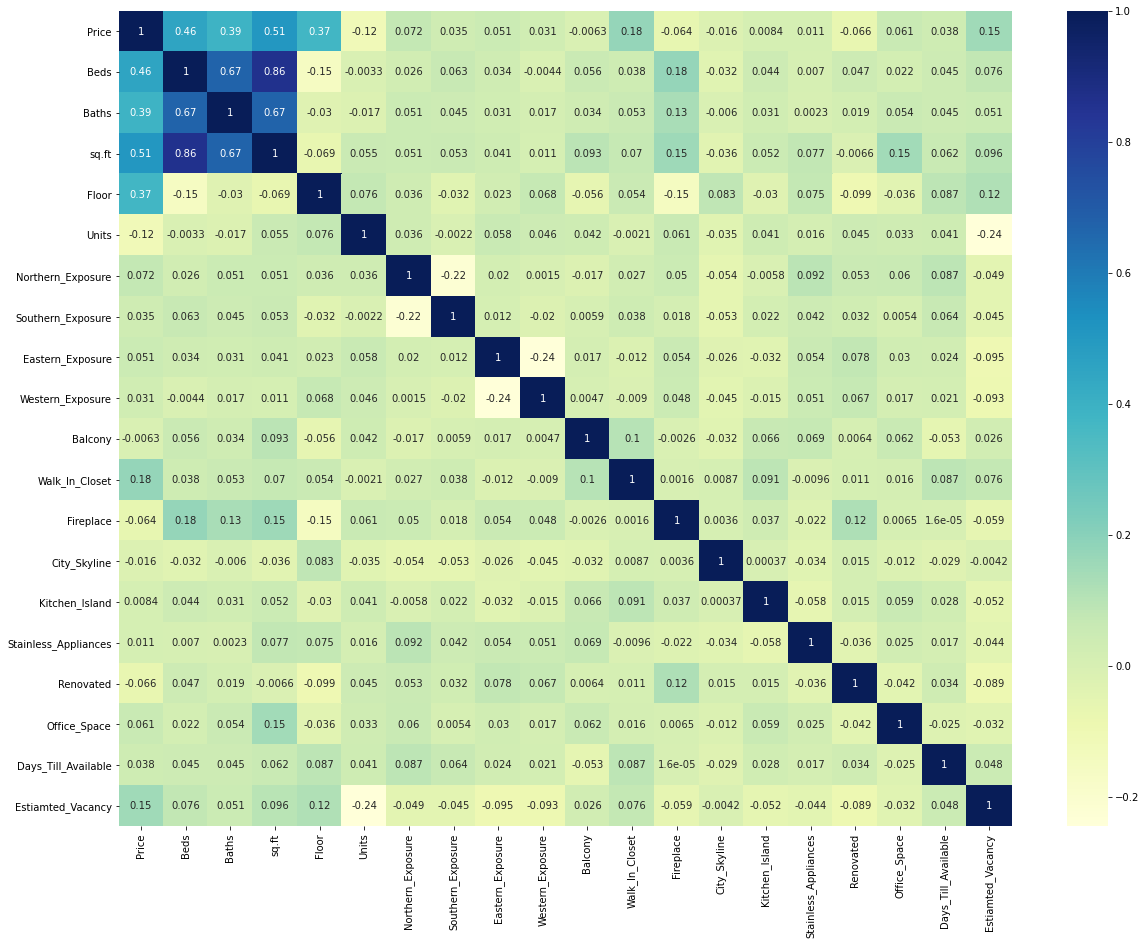

In [33]:
# Correlation Heatmap


plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [34]:
#drop columns corr() is less than 0.30

df2=df.drop(['Day_Recorded','Apartment Name', 'Address', 'Units', 'Northern_Exposure',
       'Southern_Exposure', 'Eastern_Exposure', 'Western_Exposure', 'Balcony',
       'Walk_In_Closet', 'Fireplace', 'City_Skyline', 'Kitchen_Island',
       'Stainless_Appliances', 'Renovated', 'Office_Space',
       'Days_Till_Available', 'Day_of_the_week_recorded', 'Estiamted_Vacancy'],axis=1)

In [35]:
df2.head()


,Price,Beds,Baths,sq.ft,Floor,City,Move_in_date(new)
0,2377,0,1,523,5,Washington DC,2021-09-02
1,2816,1,1,713,2,Washington DC,2021-09-02
2,3811,2,2,1252,6,Washington DC,2021-09-02
3,1549,0,1,456,2,Washington DC,2021-09-02
4,1753,1,1,580,3,Washington DC,2021-09-02


In [36]:
#In city Column there are different city 

df2.City.value_counts()

Washington DC    17507
San Francisco    13463
New York City     9246
Boston            8742
Los Angeles       6376
Seattle           1936
San Diego         1758
Orange County     1552
Denver            1372
Inland Empire      858
Name: City, dtype: int64

In [37]:
#one hat coding

df3 = pd.get_dummies(df2)
df3.head()

,Price,Beds,Baths,sq.ft,Floor,Move_in_date(new),City_Boston,City_Denver,City_Inland Empire,City_Los Angeles,City_New York City,City_Orange County,City_San Diego,City_San Francisco,City_Seattle,City_Washington DC
0,2377,0,1,523,5,2021-09-02,0,0,0,0,0,0,0,0,0,1
1,2816,1,1,713,2,2021-09-02,0,0,0,0,0,0,0,0,0,1
2,3811,2,2,1252,6,2021-09-02,0,0,0,0,0,0,0,0,0,1
3,1549,0,1,456,2,2021-09-02,0,0,0,0,0,0,0,0,0,1
4,1753,1,1,580,3,2021-09-02,0,0,0,0,0,0,0,0,0,1


In [38]:
x = df3[['Beds','Baths','sq.ft','Floor','City_Boston', 'City_Denver', 'City_Los Angeles', 'City_New York City',
       'City_Orange County', 'City_San Diego', 'City_San Francisco', 'City_Seattle',
       'City_Washington DC','Move_in_date(new)']]
y = df3['Price']


<AxesSubplot:>

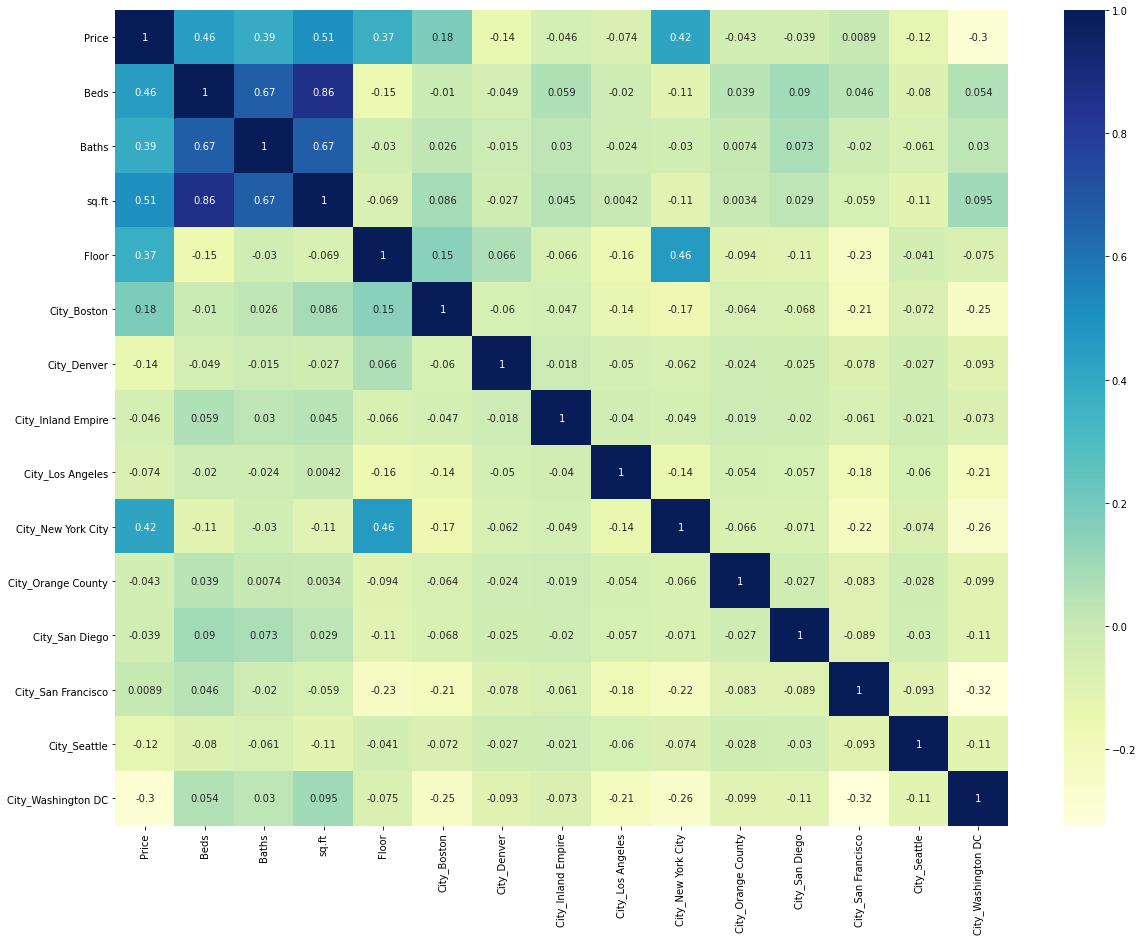

In [39]:
# Correlation Heatmap


plt.figure(figsize=(20,15))
sns.heatmap(df3.corr(),annot=True,cmap="YlGnBu")

In [40]:
#
x=df3[['Beds','Baths','sq.ft','Floor']]


#add target columns into y
y=df3['Price']

In [41]:
x.head()

,Beds,Baths,sq.ft,Floor
0,0,1,523,5
1,1,1,713,2
2,2,2,1252,6
3,0,1,456,2
4,1,1,580,3


In [42]:
y.head()

0    2377
1    2816
2    3811
3    1549
4    1753
Name: Price, dtype: int64

In [43]:
#Split  x and y

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .25, random_state=7)

In [44]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((47107, 4), (47107,), (15703, 4), (15703,))

In [45]:
x_train.head()


,Beds,Baths,sq.ft,Floor
17832,3,2,1290,40
35122,0,2,615,4
47094,2,2,1046,3
42553,2,2,1072,12
42748,2,2,1059,1


In [46]:
y_train.head()

17832    4830
35122    2277
47094    4828
42553    3531
42748    2609
Name: Price, dtype: int64

In [47]:
x_test.head()

,Beds,Baths,sq.ft,Floor
58056,2,1,915,8
20178,1,1,792,6
52650,0,1,505,12
2520,1,1,583,12
54712,0,1,396,9


In [48]:
y_test.head()

58056    2526
20178    2600
52650    2357
2520     3863
54712    1553
Name: Price, dtype: int64

In [49]:
x_train.describe() 

,Beds,Baths,sq.ft,Floor
count,47107.000000,47107.000000,47107.000000,47107.000000
mean,1.292419,1.408814,847.748445,6.432335
std,0.707406,0.546661,250.546023,7.268377
min,0.000000,1.000000,210.000000,1.000000
25%,1.000000,1.000000,674.000000,2.000000
50%,1.000000,1.000000,785.000000,4.000000
75%,2.000000,2.000000,1050.000000,8.000000
max,3.000000,3.000000,1917.000000,49.000000


In [50]:
y_train.describe() 

count    47107.000000
mean      3007.472605
std       1015.458925
min       1211.000000
25%       2290.000000
50%       2809.000000
75%       3462.000000
max       9890.000000
Name: Price, dtype: float64

### model building

### RandomForestRegressor

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
model=RandomForestRegressor(n_estimators = 100,random_state=7)

In [53]:
#model fit

model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)
print( )

# mean_squared_error

print('mean_squared_error=',mean_squared_error(y_test,y_pred))
print( )

# root_mean_squared_error

rmse=sqrt(mean_squared_error(y_test,y_pred))
print('root_mean_squared_error=',rmse)
print( )

# mean_absolute_error

MAE=mean_absolute_error(y_test,y_pred)
print("mean_absolute_erro=",MAE)
print( )

# mean_absolute_percentage_error

MAPE=mean_absolute_percentage_error(y_test,y_pred)
print('mean_absolute_percentage_error=',MAPE)


[2596.07044289 2585.0314905  2313.10650915 ... 3358.82219307 2317.83783298
 2674.92072307]

mean_squared_error= 67224.91556380881

root_mean_squared_error= 259.27768041967823

mean_absolute_erro= 120.91216438582234

mean_absolute_percentage_error= 0.044571779521446156


In [54]:
model.score(x_test,y_test)*100

93.18362489005702

### LinearRegression

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
model2=LinearRegression()
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
print(y_pred2)
print( )

# mean_squared_error

print('mean_squared_error=',mean_squared_error(y_test,y_pred2))

# root_mean_squared_error

rmse=sqrt(mean_squared_error(y_test,y_pred2))
print('root_mean_squared_erro=',rmse)
print( )

# mean_absolute_error

MAE=mean_absolute_error(y_test,y_pred2)
print("mean_absolute_erro=",MAE)
print( )

# mean_absolute_percentage_error

MAPE=mean_absolute_percentage_error(y_test,y_pred2)
print('mean_absolute_percentage_error=',MAPE)


[3389.26926517 2789.33892086 2464.28471138 ... 2820.02353328 3071.82464886
 3200.07954069]

mean_squared_error= 568849.6555662537
root_mean_squared_erro= 754.2212245530178

mean_absolute_erro= 556.1052071115474

mean_absolute_percentage_error= 0.18977763773382617


### xgboost

Insatll xgboost in jupyter
open anaconda promat and
use command 'conda install -c mndrake xgboost'

In [57]:
import xgboost

In [58]:
model3=xgboost.XGBRegressor()
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
print(y_pred3)

# mean_squared_error

print('mean_squared_error=',mean_squared_error(y_test,y_pred3))
print( )

# root_mean_squared_error

rmse=sqrt(mean_squared_error(y_test,y_pred3))
print('root_mean_squared_erro=',rmse)
print( )

# mean_absolute_error

MAE=mean_absolute_error(y_test,y_pred3)
print("mean_absolute_erro=",MAE)
print( )

# mean_absolute_percentage_error

MAPE=mean_absolute_percentage_error(y_test,y_pred3)
print('mean_absolute_percentage_error=',MAPE)

[2592.6511 2746.0818 2272.226  ... 2897.1277 2800.2188 2721.074 ]
mean_squared_error= 144353.7815407939

root_mean_squared_erro= 379.9391813709056

mean_absolute_erro= 259.70939048053367

mean_absolute_percentage_error= 0.09339809846805601


In [59]:
model3.score(x_test,y_test)*100

85.36302328878574

In [60]:
from sklearn.svm import SVR

In [61]:
model1=SVR()
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
print(y_pred1)
print()

# mean_squared_error

print('mean_squared_error=',mean_squared_error(y_test,y_pred1))
print()

# root_mean_squared_error

rmse=sqrt(mean_squared_error(y_test,y_pred1))
print('root_mean_squared_erro=',rmse)
print()


# mean_absolute_error


MAE=mean_absolute_error(y_test,y_pred1)
print("mean_absolute_erro=",MAE)
print()

# mean_absolute_percentage_error
MAPE=mean_absolute_percentage_error(y_test,y_pred3)
print('mean_absolute_percentage_error=',MAPE)


[2874.76083304 2642.29662644 2304.79049659 ... 2464.62733141 2763.58563986
 2954.30132727]

mean_squared_error= 775060.072707577

root_mean_squared_erro= 880.3749614269916

mean_absolute_erro= 600.3079785602038

mean_absolute_percentage_error= 0.09339809846805601


In [151]:
#	Beds	Baths	sq.ft	Floor

#inp=np.array([2,1,915,8])
#ip=inp.reshape(1, -1)
#ip
#model.predict(ip)

In [62]:
#user input,
#price predict


my_array = []
for i in range(4):
    b=float(input('Number of Beds:'))
    my_array.append(b)
    b=float(input('Number of Baths:'))
    my_array.append(b)
    b=float(input('Size of plot in(sq.ft):'))
    my_array.append(b)
    b=float(input('Which Floor:'))
    my_array.append(b)
    break
my_array = np.array(my_array)

ip=my_array.reshape(1, -1)

a=model.predict(ip)

print('Predicted House price:',np.around(a))

#print('Predicted House price:',model.predict(ip))

Number of Beds:4
Number of Baths:2
Size of plot in(sq.ft):1001
Which Floor:5
Predicted House price: [3194.]
